In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
data = pd.read_csv("netflix_titles.csv")

In [112]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [113]:
data.shape

(8807, 12)

In [114]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [115]:
data.dropna(inplace = True)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [117]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce', format='%B %d, %Y', infer_datetime_format=True)

In [118]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      4
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [119]:
direc = data["director"].value_counts().head(10)

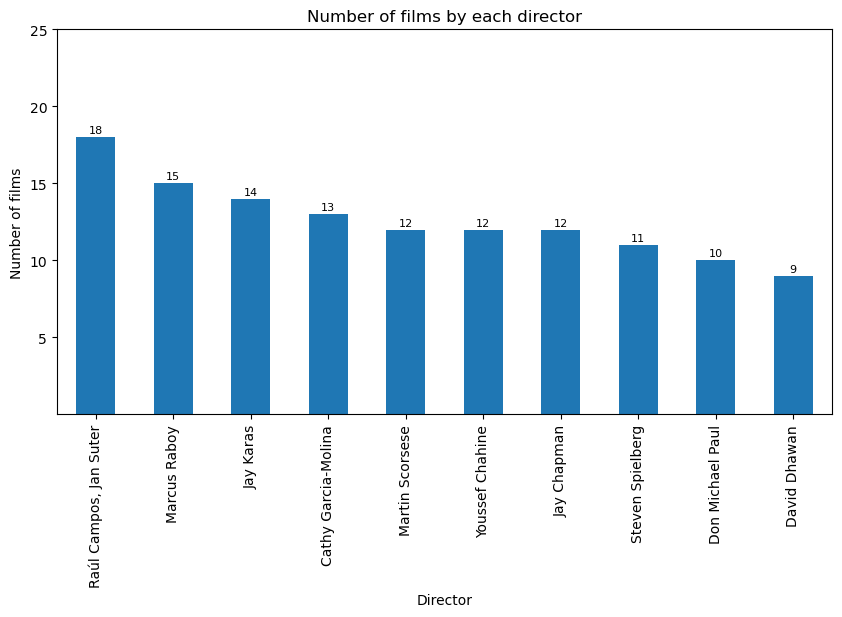

In [120]:
plt.figure(figsize=(10,5))

ax = direc.plot(kind = "bar")
plt.xlabel("Director")
plt.ylabel("Number of films")
plt.title("Number of films by each director")
plt.yticks([5,10,15,20,25])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [39]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [121]:
indian = data[data["country"]=="India"]

In [122]:
tm = indian.groupby(["type"])["type"].count()

([<matplotlib.patches.Wedge at 0x1e765edeeb0>,
 [Text(-1.3995578632046881, 0.03518220490429154, 'Movie'),
  Text(1.399557861454751, -0.03518227451720046, 'TV Show')],
 [Text(-0.8997157692030138, 0.022617131724187414, '99.20%'),
  Text(0.8997157680780543, -0.022617176475343153, '0.80%')])

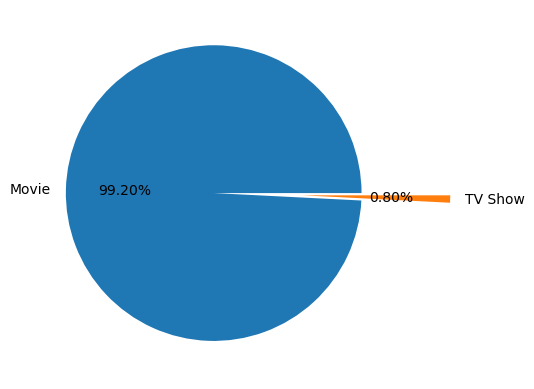

In [123]:
plt.pie(tm, labels = tm.index, explode = [0.3,0.3], autopct="%.2f%%")

In [124]:
ratings = indian.groupby(["rating"])["rating"].count()

In [125]:
ratings

rating
NR            4
PG            2
PG-13         4
R             1
TV-14       516
TV-G          4
TV-MA       217
TV-PG       116
TV-Y7        10
TV-Y7-FV      1
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

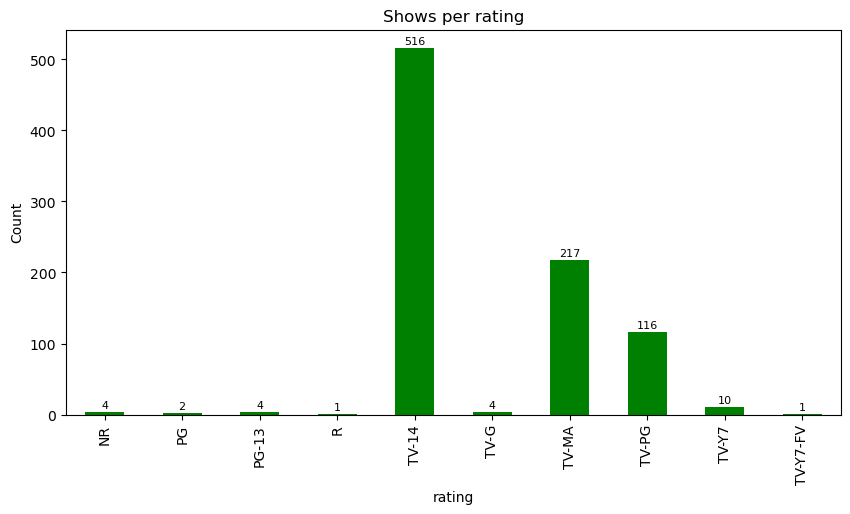

In [126]:
plt.figure(figsize=(10,5))

ax = ratings.plot(kind = "bar", color = "green")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.title("Shows per rating")
plt.ylabel("Count")

In [66]:
indian

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [127]:
movie = indian[indian["type"]=="Movie"]

In [128]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...


In [129]:
indian_director = movie["director"].value_counts().head(5)

Text(0.5, 1.0, 'Top Indian Directors')

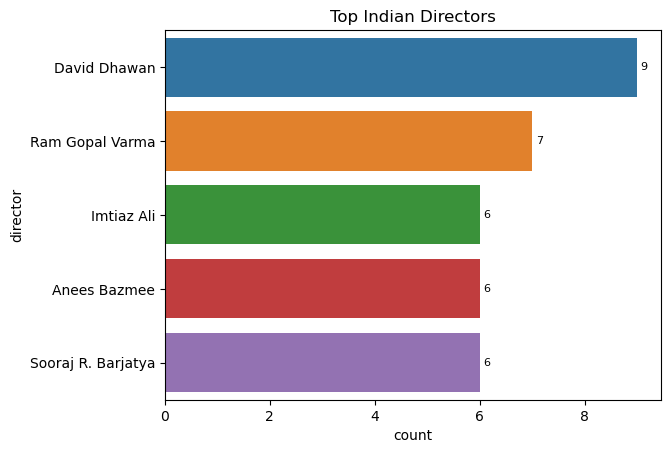

In [130]:
ax = sns.countplot(y="director", data=movie[movie["director"].isin(indian_director.index)])

for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                fontsize=8, color='black',
                xytext=(5, 0), textcoords='offset points')
    
plt.title("Top Indian Directors")

In [131]:
year_wise = indian["release_year"].value_counts().head(10)

Text(0.5, 1.0, 'Year-wise Count')

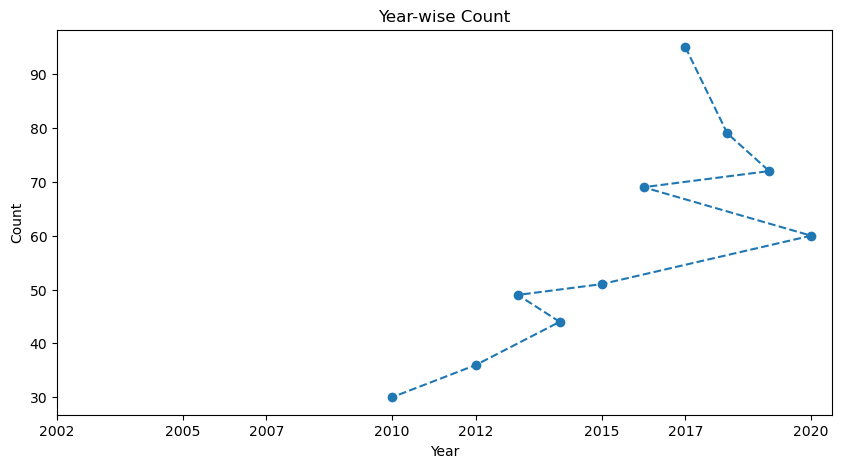

In [132]:
plt.figure(figsize=(10,5))

plt.plot(year_wise.index, year_wise.values,marker = "o",linestyle = "--")

plt.xticks([2002,2005,2007,2010,2012,2015,2017,2020])

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year-wise Count")

In [97]:
indian.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...


In [158]:
data["list"] =  data['listed_in'].apply(lambda x:(x.split(',')[0]))

In [159]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,list
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,British TV Shows
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Dramas
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Comedies


In [162]:
top_list = data["list"].value_counts()[:10]

Text(0.5, 1.0, 'Category of Movies')

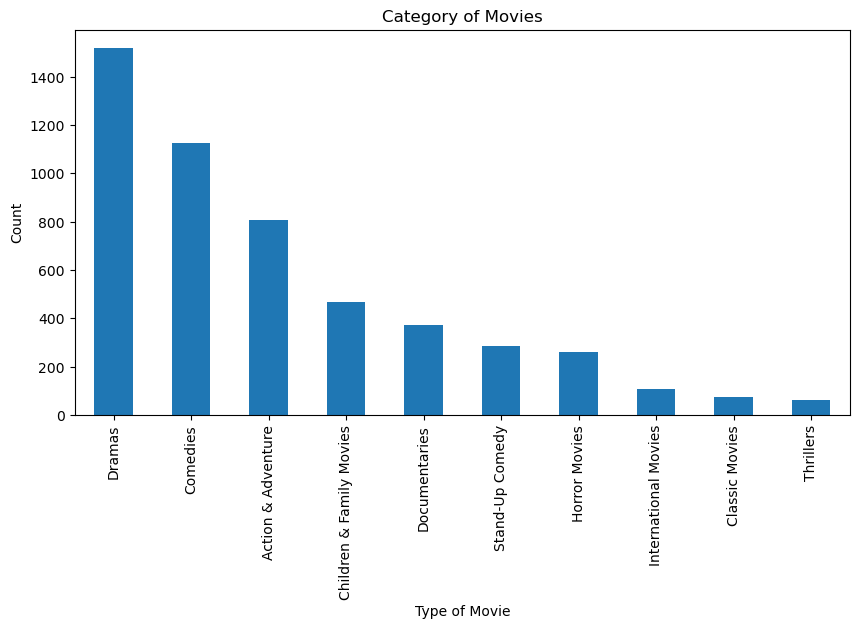

In [165]:
plt.figure(figsize=(10,5))

ax = top_list.plot(kind = "bar")

plt.xlabel("Type of Movie")
plt.ylabel("Count")
plt.title("Category of Movies")

In [168]:
release_year = data["date_added"].dt.year.value_counts()

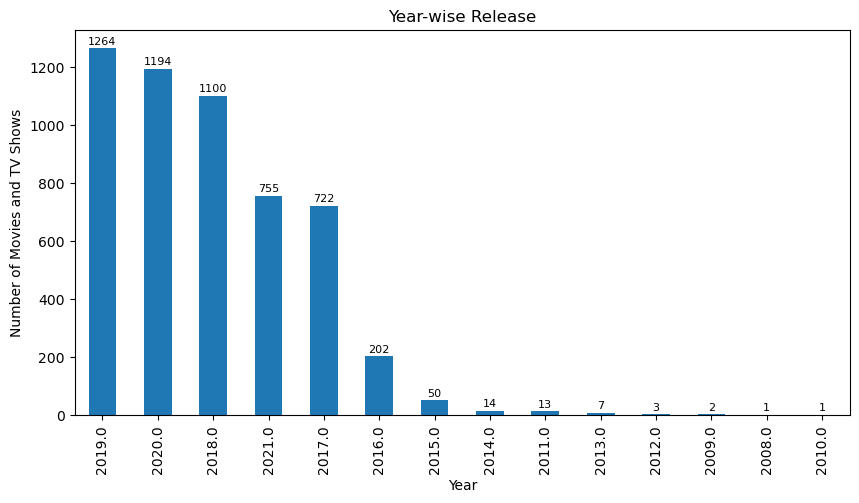

In [172]:
plt.figure(figsize=(10,5))

ax = release_year.plot(kind = "bar")

plt.xlabel("Year")
plt.ylabel("Number of Movies and TV Shows")
plt.title("Year-wise Release")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')